C:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0200 - val_loss: 5.7894e-04
Epoch 2/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 3/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0018 - val_loss: 4.8569e-04
Epoch 4/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0014 - val_loss: 4.3427e-04
Epoch 5/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0013 - val_loss: 3.6223e-04
Epoch 6/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0012 - val_loss: 3.4089e-04
Epoch 7/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0011 - val_loss: 4.2235e-04
Epoch 8/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0010 - val_loss: 3.0584e-04
Epoch 9/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0010 - val_loss: 2.8831e-04
Epoch 10/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 9.6883e-04 - val_loss: 4.3435e-04
Epoch 11/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 8.2739e-04 - val_loss: 3.

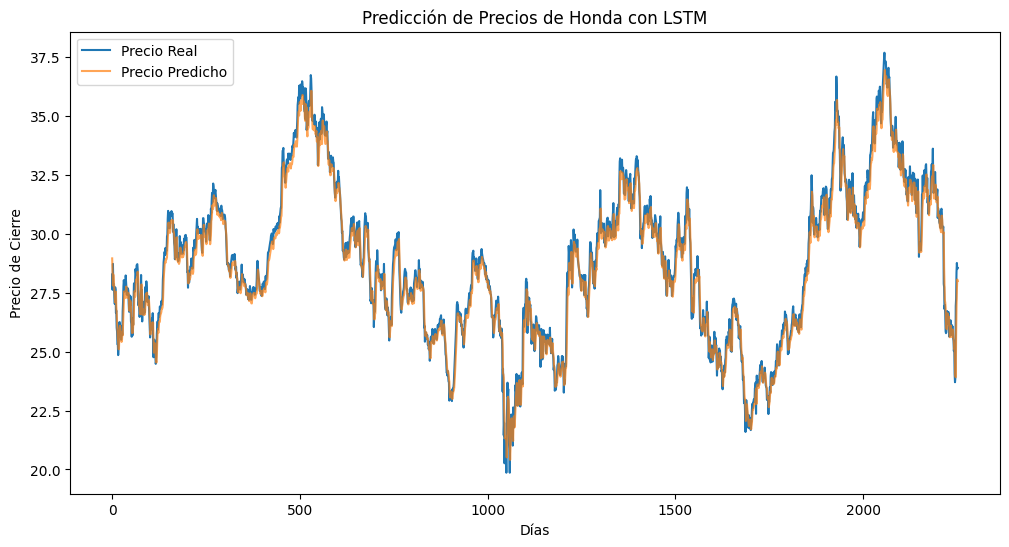

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Cargar datos
data = pd.read_csv('Honda_Data.csv')
close_prices = data['Close'].values.reshape(-1, 1)

# Normalizar datos (rango [0, 1])
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(close_prices)

# Crear secuencias temporales
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 30  # Usar 30 días para predecir el día 31
X, y = create_sequences(scaled_prices, window_size)

# Dividir en entrenamiento (80%) y prueba (20%)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Construir modelo LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluar el modelo
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Pérdida en entrenamiento: {train_loss:.4f}')
print(f'Pérdida en prueba: {test_loss:.4f}')

# Predecir y desnormalizar
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Precio Real')
plt.plot(y_pred, label='Precio Predicho', alpha=0.7)
plt.title('Predicción de Precios de Honda con LSTM')
plt.xlabel('Días')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()

C:\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - loss: 0.0094 - mae: 0.0486 - val_loss: 0.0017 - val_mae: 0.0362
Epoch 2/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - loss: 0.0013 - mae: 0.0237 - val_loss: 4.9252e-04 - val_mae: 0.0171
Epoch 3/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - loss: 0.0012 - mae: 0.0222 - val_loss: 4.6011e-04 - val_mae: 0.0165
Epoch 4/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - loss: 0.0012 - mae: 0.0226 - val_loss: 6.1827e-04 - val_mae: 0.0203
Epoch 5/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 16s 56ms/step - loss: 9.5092e-04 - mae: 0.0206 - val_loss: 3.0730e-04 - val_mae: 0.0134
Epoch 6/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 27s 97ms/step - loss: 8.8203e-04 - mae: 0.0198 - val_loss: 3.8776e-04 - val_mae: 0.0155
Epoch 7/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - loss: 9.1817e-04 - mae: 0.0202 - val_loss: 2.7708e-04 - val_mae: 0.0127
Epoch 8/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 34s 120ms/step - loss: 7.6417e-04 - mae: 0.0188 - val_loss: 2.6896e-04 - val

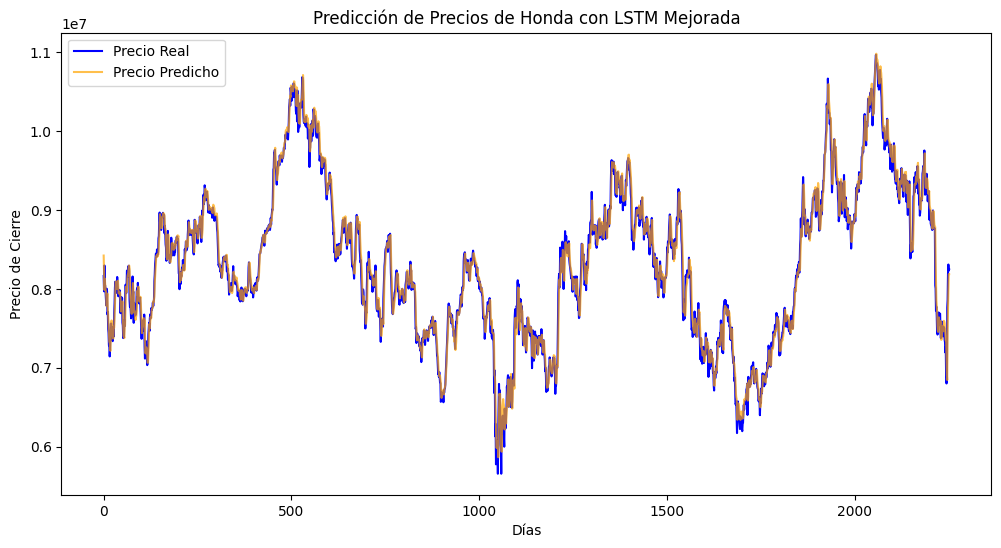

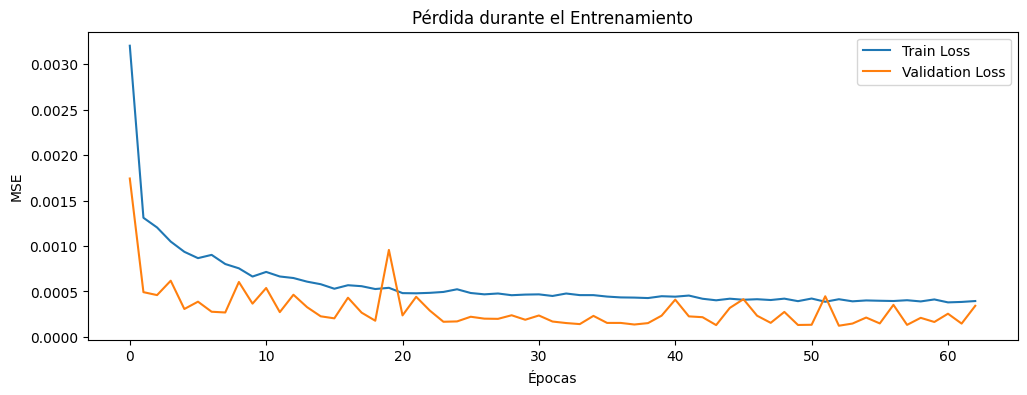

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Cargar datos
data = pd.read_csv('Honda_Data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Seleccionar features adicionales
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Close'
dataset = data[features].values

# Normalizar datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

# Crear secuencias temporales (usando múltiples features)
def create_sequences(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size, :])  # Todas las features
        y.append(data[i+window_size, features.index(target)])  # Solo 'Close'
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(scaled_data, target, window_size)

# Dividir en entrenamiento (80%) y prueba (20%)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Construir modelo Bidirectional LSTM mejorado
model = Sequential([
    Bidirectional(LSTM(100, return_sequences=True), input_shape=(window_size, len(features))),
    Dropout(0.3),
    Bidirectional(LSTM(100)),
    Dropout(0.3),
    Dense(1)
])

# Compilar con learning rate ajustado
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Early Stopping para evitar overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar el modelo
train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Entrenamiento - Loss: {train_loss:.4f}, MAE: {train_mae:.4f}')
print(f'Prueba - Loss: {test_loss:.4f}, MAE: {test_mae:.4f}')

# Predecir y desnormalizar
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(
    np.concatenate([np.zeros((len(y_pred), len(features)-1)), y_pred], axis=1)
)[:, -1]  # Solo la columna 'Close'
y_test = scaler.inverse_transform(
    np.concatenate([np.zeros((len(y_test), len(features)-1)), y_test.reshape(-1, 1)], axis=1)
)[:, -1]

# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}')

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Precio Real', color='blue')
plt.plot(y_pred, label='Precio Predicho', color='orange', alpha=0.7)
plt.title('Predicción de Precios de Honda con LSTM Mejorada')
plt.xlabel('Días')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()

# Graficar pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.show()